Trending YouTube Video Statistics Analysis Para Francia G02

Objetivo
Desarrollar una propuesta de análisis y analítica a partir de un conjunto de datos, aplicando lametodología CRISP-DM

LIMPIEZA DE DATOS

1. Los datos de cada país se encuentran en archivos individuales en formato CSV y la descripciónde sus categorías en un archivo de tipo JSON

2. Este conjunto de datos, ha sido modificado incorporándole cuatro nuevas columnas:

    • state

    • lat

    • lon

    • geometry

3. Se debe comprender el negocio y realizar la inspeccion de los datos, verificar su calidad, limpiar los datos y preprocesar los datos.

4. El dataset limpio estara dentro de la carpeta 'data' llamado 'clean_FR.csv'

PREGUNTAS A RESPONDER

POR CATEGORIA DE VIDEO
1. ¿Qué categorías de videos son las de mayor tendencia?
2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?
3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?
4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

POR EL TIEMPO TRANSCURRIDO

5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

POR CANALES DE YOUTUBE

6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

POR GEOGRAFIA DEL PAIS

7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

ADICIONALMENTE AL CLIENTE LE GUSTARIA CONOCER

8. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?
9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

LIMPIEZA DE DATOS CODIGO

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#Importar data

FR_df=pd.read_csv("FRvideos_cc50_202101.csv")

In [4]:
#Importar el json y extraer la data que nos interesa
import json
FR_category={}
with open("FR_category_id.json") as f:
    FR_data=json.load(f)
for i in list(pd.DataFrame(FR_data['items']).id.values):
    FR_category[i]=pd.DataFrame(FR_data['items'])[pd.DataFrame(FR_data['items']).id==i].snippet.values[0]['title']

In [5]:
#vemos la informacion de toda la informacion de las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [6]:
FR_df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
39018,CO_-_vr-HQ0,18.06.06,samhini 1444 2M Complete مسلسل سامحيني 1444 كاملة,VPM.TV.AlflamMaghribia,22,2018-06-05T19:47:32.000Z,[none],232499,2129,300,214,https://i.ytimg.com/vi/CO_-_vr-HQ0/default.jpg,False,False,False,samhini ep 1444 2M Complete مسلسل سامحيني 1444 كاملة,Provence Alpes Cote D'azur,43.519991,5.449993,POINT (5.449992634 43.51999086)
27558,Yz-87WdkQcU,18.03.04,Chelsea vs Tottenham Hotspur 1-3 - All Goals & Extended Highlights - EPL 01/04/2018 HD,Shpendi10CFC,17,2018-04-02T01:00:18.000Z,"Chelsea vs Tottenham""|""Chelsea vs Tottenham 2018""|""Chelsea vs Tottenham 1-3""|""Chelsea vs Tottenham highlights""|""Chelsea vs Tottenham all goals""|""Chelsea vs Tottenham goals \u0026 highlights""|""Tottenham""|""chelsea",721798,2212,258,222,https://i.ytimg.com/vi/Yz-87WdkQcU/default.jpg,False,False,False,Chelsea vs Tottenham Hotspur 1-3 - All Goals & Extended Highlights - EPL 01/04/2018 HD\n\n[LIVE NOW] Chelsea vs Tottenham Hotspur Live Stream \n(LIVE NOW) Chelsea vs Tottenham Hotspur Live Stream \nChelsea vs Tottenham Hotspur 1-3 All Goals and Highlights with English Commentary 2017-18 HD 720p\nChelsea vs Tottenham Hotspur 1 - 3 ● All Goals | 2016/17 [HD] \nChelsea vs Tottenham Hotspur 1-3 Goal Morata 01/04/2018 |HD|\nChelsea vs Tottenham Hotspur 1-3 Goal Eriksen 01/04/2018 |HD| \nChelsea vs Tottenham Hotspur 1-3 All Goals & Highlights 01/04/2018\nChelsea vs Tottenham Hotspur 1:3 2018 - Match Preview 01/04/2018 HD \nChelsea vs Tottenham Hotspur 1-3 All Goals & Highlights 01/04/2018 HD,Ile De France,48.533302,2.666648,POINT (2.666648314 48.53330243)
29608,Klxdl0R0S10,18.19.04,"Avec Laurent Gerra, les personnalités disparues chantent la grève",RTL - Toujours avec vous,25,2018-04-18T08:30:20.000Z,"Laurent Gerra""|""info""|""replay""|""replay intégral""|""humour""|""RTL""|""RTL replay""|""rtl actu""|""rtl podcast""|""rtl direct""|""rtl jingle""|""rtl live""|""rtl laurent gerra""|""rtl gerra""|""rtl radio playlist""|""rtl radio""|""rtl radio en direct""|""rtl animateur""|""rtl news""|""rtl infos",8273,109,9,14,https://i.ytimg.com/vi/Klxdl0R0S10/default.jpg,False,False,False,"Ce mercredi 18 avril, Laurent Gerra imite Fernandel, Bourvil, Joe Dassin et Charles Trenet qui chantent la grève, François Hollande invité de l'émission de Dave sur TV Melody, et Jean Lassalle qui fait le coup de feu à la gare Montparnasse.\n\nAbonnez-vous à la chaîne officielle de la radio RTL : http://bit.ly/2gGC4S6\nRTL sur Facebook http://bit.ly/1XJccB5\nRTL sur Twitter http://bit.ly/2gGDmNa\nRTL sur Instagram http://bit.ly/1WNgcUx\n \nhttp://www.rtl.fr/ \n\nInformations, divertissement, humour, culture, faits divers, sport… RTL vous accompagne tous les jours aussi en vidéo. \nRetrouvez les chroniques et les émissions de votre radio préférée et toute l’actualité en vidéo. \n \nEt nos autres chaînes : \nRTL Girls : la rubrique des filles qui feront le monde de demain http://bit.ly/2hg65JU\nRTL Futur : Comment les technologies d’aujourd’hui façonnent le monde de demain http://bit.ly/2h5wDNu\nRTL Super : Le meilleur des super-héros, série, cinéma et jeux est sur Super http://bit.ly/2h26xbp\nLes Grosses Têtes : Les meilleurs moments de l’émission culte de RTL en vidéo http://bit.ly/2gjwlkY\nLe Grand Studio RTL : Les plus grands artistes se retrouvent sur la scène du Grand Studio RTL, retrouvez toutes les vidéos sur la chaîne dédiée http://bit.ly/2hhAHGO \n\nRTL2 : le meilleur de la culture Pop-Rock en vidéo avec RTL2 : Concerts, Sessions acoustiques, Interviews, Reportages et Portraits. http://bit.ly/2hlOGiE \nFun Radio, le son dancefloor : Toutes les vidéos qui font l’actu de votre radio préférée : Set des plus grands Dj, interviews, vie de la FunRadio Family http://bit.ly/2gjtwjM\nBrunoDansLaRadio : Les meilleurs moments en vidéo de la matina

In [7]:
#valores nulos en cada columna
FR_df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [8]:
#Analizando  la media, moda,desv estandar, etc.
FR_df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04,40724.000000,40724.000000
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03,36.986535,-2.314779
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04,19.889834,25.443453
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-21.033511,-61.532999
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01,42.699989,-0.530030
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02,45.899975,2.666648
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02,48.516663,6.030009
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06,50.283325,55.712816


In [9]:

#analizando valores atipicos
columns_to_plot = ['category_id','views', 'likes', 'dislikes', 'comment_count','lat','lon']
Q1 = FR_df[columns_to_plot].quantile(0.25)
Q3 = FR_df[columns_to_plot].quantile(0.75)
IQR = Q3 - Q1

outliers = ((FR_df[columns_to_plot] < (Q1 - 1.5 * IQR)) | (FR_df[columns_to_plot] > (Q3 + 1.5 * IQR)))
outliers.sum()


category_id      2931
views            5163
likes            5695
dislikes         5174
comment_count    5078
lat              8671
lon              8671
dtype: int64

In [10]:
#Analizando los tipos de datos
FR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [11]:
#Obtener la cantidad de filas duplicadas del dataframe
FR_df[FR_df.duplicated()].shape[0]

0

In [12]:
#Verificamos si los comentarios estan desabilitados para ciertos videos
FR_df.comments_disabled.value_counts()

comments_disabled
False    39835
True       889
Name: count, dtype: int64

In [13]:
#Verificamos si los likes estan  desabilitados para ciertos videos
FR_df.ratings_disabled.value_counts()

ratings_disabled
False    40020
True       704
Name: count, dtype: int64

In [14]:
#Veremos si los videos tuvieron un error o han sido removidos 
FR_df.video_error_or_removed.value_counts()

video_error_or_removed
False    40702
True        22
Name: count, dtype: int64

Problemas Reportados 


1. El tipo de data de category_id debe ser objeto y no entero.

2. La tipo de dato de trending_date y publish_time deben ser datetime en ves de object.

3. Hay datos atipicos, sin embargo los que pueden afectar nuestros resultados son  views, likes, 
dislikes, comment_count, por lo que hay que aplicarles una tranformacion.

4. Hay columnas Inecesarias 'thumbnail_link','tags', 'description'

Consideraciones 

1. La unica columna con valores NA es description

2. No hay columnas duplicadas.

3. Hay videoos removidos, likes desabilitados y comentarios desabilitados, los cuales hay que tomar en consideracion al momento de realizar el analisis.

4. No hay datos vacios



DATA CLEANING


Creando el nuevo Dataset y eliminando las columnas innecesarias

In [15]:
#Crear el dataset de francia para realizar la limpieza
copy_FR=FR_df.copy()

In [16]:
#Eliminar columnas innecesarias
copy_FR.drop(['thumbnail_link','tags','tags','description'],axis=1,inplace=True)


In [17]:
#Haciendo una prueba para ver si las columnas fueron eliminadas satisfactoriamente
for i in ['thumbnail_link','tags', 'description']:
    if i in copy_FR.columns:
        print("wrong")
  

Cambiar category id de int a object para que sea un categorico nominal y se nos facilite trabajar con futuras bibliotecas.

In [18]:
copy_FR['category_id'] = copy_FR['category_id'].astype(str)


In [19]:
#Verificamos si el cambio se realizo de manera correcta 
copy_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  object 
 5   publish_time            40724 non-null  object 
 6   views                   40724 non-null  int64  
 7   likes                   40724 non-null  int64  
 8   dislikes                40724 non-null  int64  
 9   comment_count           40724 non-null  int64  
 10  comments_disabled       40724 non-null  bool   
 11  ratings_disabled        40724 non-null  bool   
 12  video_error_or_removed  40724 non-null  bool   
 13  state                   40724 non-null  object 
 14  lat                     40724 non-null

Cambiando los tipos de datos de trending date y publish time al formato de Datetime


In [20]:
copy_FR['trending_date'] = pd.to_datetime(copy_FR['trending_date'], format='%y.%d.%m', errors='coerce')


In [21]:
copy_FR['year'] = copy_FR['trending_date'].dt.year
copy_FR['month'] = copy_FR['trending_date'].dt.month
copy_FR['day'] = copy_FR['trending_date'].dt.day


In [22]:
#Convertir la columna 'trending_date' date a datetime
copy_FR['trending_date'] = pd.to_datetime(copy_FR[['year', 'month', 'day']], errors='coerce')


In [23]:
# Convierte la columna 'publish_time' al formato de datetime
copy_FR['publish_time'] = pd.to_datetime(copy_FR['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')



In [24]:
#Verificamos el resultado de 'trending_date'
copy_FR.trending_date.sample(10)

4633    2017-12-07
9580    2017-12-31
35532   2018-05-19
24530   2018-03-19
1225    2017-11-20
7956    2017-12-23
21497   2018-03-03
1930    2017-11-23
25751   2018-03-25
917     2017-11-18
Name: trending_date, dtype: datetime64[ns]

In [25]:
#verificamos el resultado de 'publish_time'
copy_FR.publish_time.sample(10)

18277   2018-02-15 11:06:00
32171   2018-05-01 20:31:08
5801    2017-12-12 19:36:21
28693   2018-04-14 22:00:30
9924    2018-01-01 16:20:47
23518   2018-03-12 14:48:16
37801   2018-05-31 14:40:05
2238    2017-11-24 16:00:01
30183   2018-04-21 16:30:01
32297   2018-05-02 12:00:04
Name: publish_time, dtype: datetime64[ns]

Aplicando tranformacion logaritmica para evitar sesgos en las columnas de views, likes , dislikes y comment count.

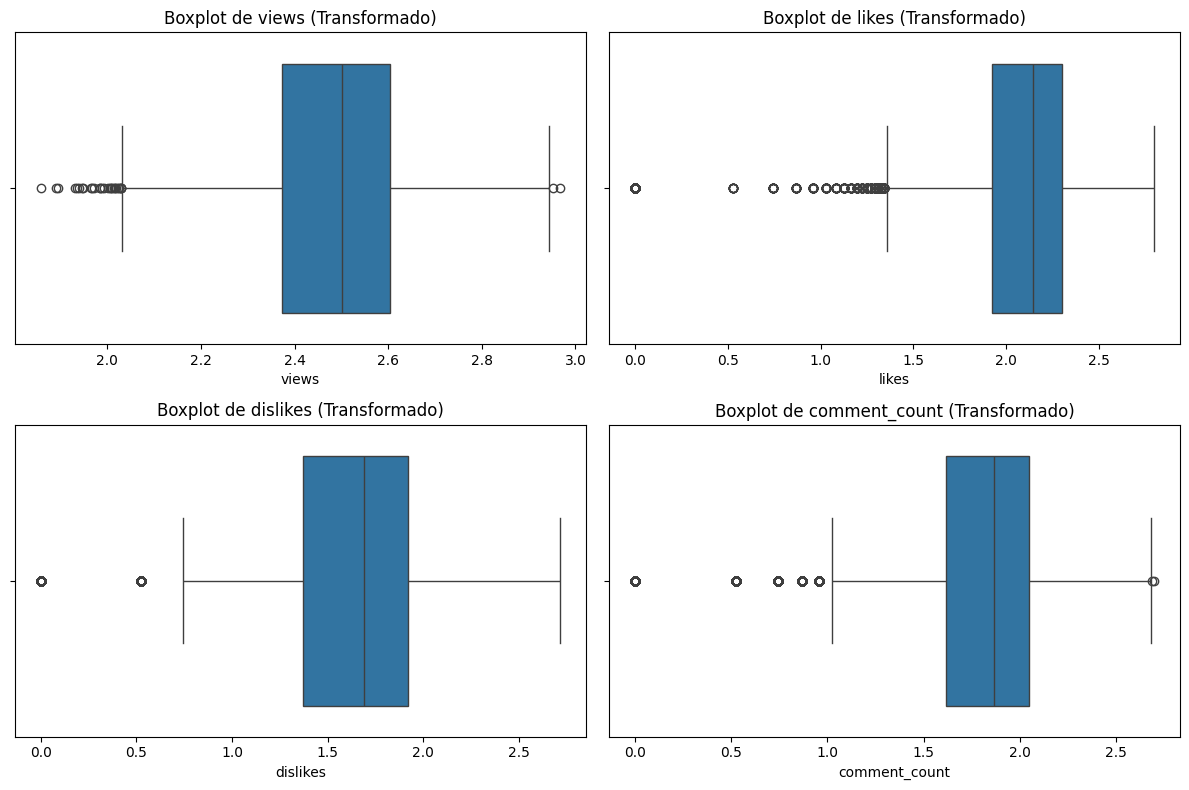

In [26]:
# Lista de columnas para aplicar la transformación logarítmica
columns_to_transform = ['views', 'likes', 'dislikes', 'comment_count']

# Aplicar logaritmo a las columnas seleccionadas
copy_FR[columns_to_transform] = np.log1p(copy_FR[columns_to_transform])

# Crea subgráficos para cada columna transformada
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=np.log1p(copy_FR[column]))  # Aplica la transformación logarítmica aquí
    plt.title(f'Boxplot de {column} (Transformado)')

plt.tight_layout()
plt.show()

In [27]:
#Hacemos una prueba para visualizar si se ha realizado de manera correcta.
columnas_interesantes = ['views', 'likes', 'dislikes', 'comment_count']

# Utiliza el método sample para obtener una muestra aleatoria
muestra_aleatoria = copy_FR[columnas_interesantes].sample(3)

# Imprime la muestra
print(muestra_aleatoria)




           views      likes  dislikes  comment_count
11805  13.638808   9.790543  7.740664       8.116716
59     10.647660   9.077266  4.276666       7.069023
36913  14.840208  11.724620  8.969796       8.942592


Paso Final: Guardar la Data

In [28]:
#Guardar el archivo
copy_FR.reset_index(drop=True)
copy_FR.to_csv('clean_FR.csv')

In [29]:
#Cargar data
clean_FR=pd.read_csv('clean_FR.csv')
clean_FR.drop('Unnamed: 0', axis=1, inplace=True)
clean_FR.publish_time=clean_FR.publish_time.astype('datetime64[ns]') 
clean_FR.trending_date=clean_FR.trending_date.astype('datetime64[ns]') 

In [30]:
clean_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40724 non-null  object        
 1   trending_date           40724 non-null  datetime64[ns]
 2   title                   40724 non-null  object        
 3   channel_title           40724 non-null  object        
 4   category_id             40724 non-null  int64         
 5   publish_time            40724 non-null  datetime64[ns]
 6   views                   40724 non-null  float64       
 7   likes                   40724 non-null  float64       
 8   dislikes                40724 non-null  float64       
 9   comment_count           40724 non-null  float64       
 10  comments_disabled       40724 non-null  bool          
 11  ratings_disabled        40724 non-null  bool          
 12  video_error_or_removed  40724 non-null  bool  

## Por categoría de videos

1. ¿Qué categorías de videos son las de mayor tendencia?



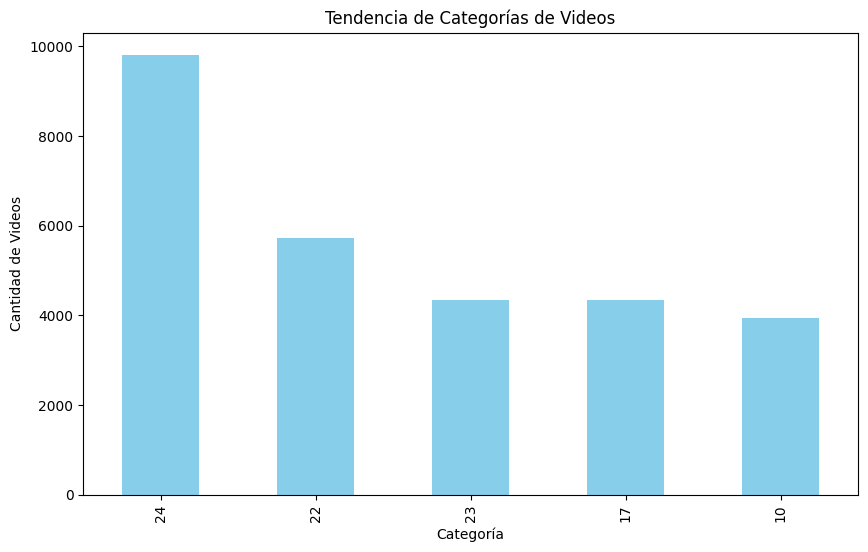

In [31]:
tendencia=clean_FR.groupby('category_id')['views'].count().sort_values(ascending=False).head()
plt.figure(figsize=(10, 6))
tendencia.plot(kind='bar', color='skyblue')
plt.title('Tendencia de Categorías de Videos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Videos')
plt.show()


2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?


<Figure size 1200x400 with 0 Axes>

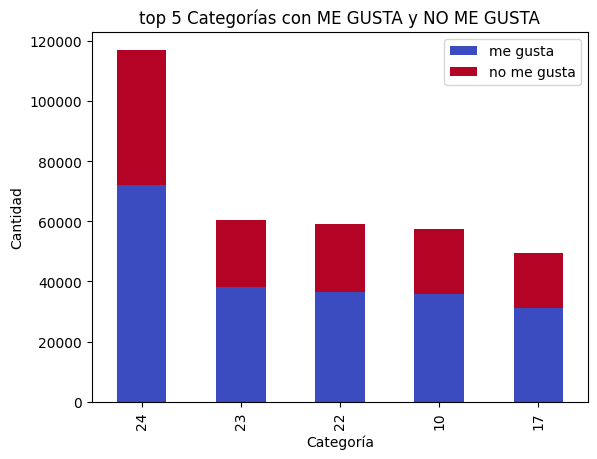

In [32]:
gustan=clean_FR.groupby('category_id')['likes'].sum().sort_values(ascending=False).head()
disgustan=clean_FR.groupby('category_id')['dislikes'].sum().sort_values(ascending=False).head()

combined_data = pd.concat([gustan, disgustan], axis=1)
combined_data.columns = ['me gusta', 'no me gusta']

plt.figure(figsize=(12, 4))
combined_data.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('top 5 Categorías con ME GUSTA y NO ME GUSTA')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?


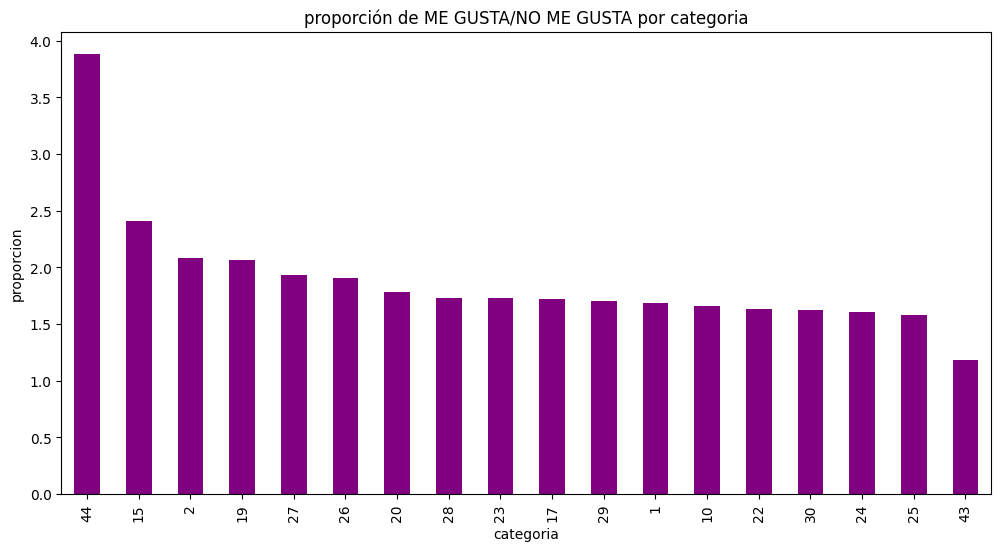

In [33]:
proporciones = clean_FR.groupby('category_id')[['likes', 'dislikes']].sum()

# Calcular la proporción de "Me gusta" / "No me gusta"
proporciones['ratio'] = proporciones['likes'] / proporciones['dislikes']
proporciones = proporciones['ratio'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
proporciones.plot(kind='bar', color='purple')
plt.title('proporción de ME GUSTA/NO ME GUSTA por categoria')
plt.xlabel('categoria')
plt.ylabel('proporcion')
plt.show()

4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

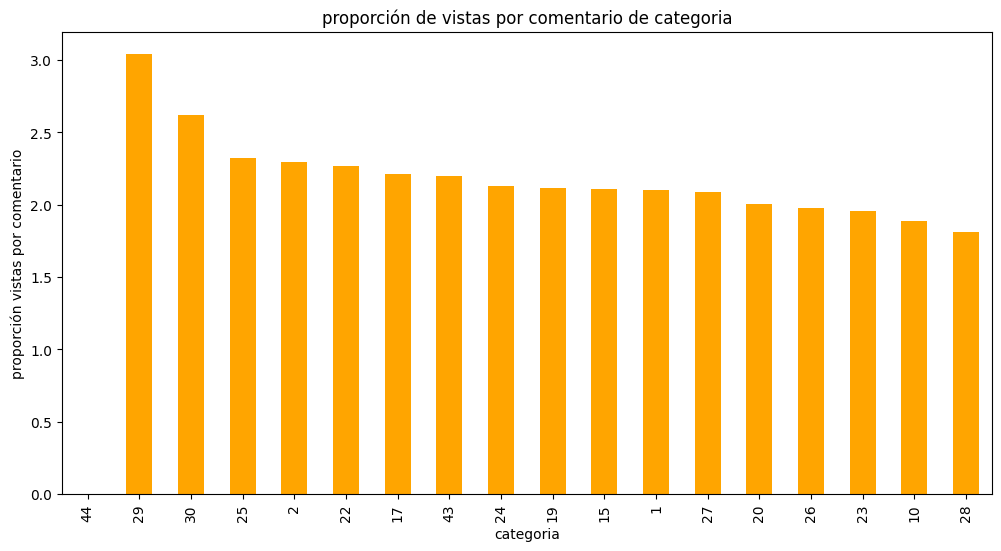

In [34]:

categorias_vistaxcomentario = clean_FR.groupby('category_id')[['views', 'comment_count']].sum()
categorias_vistaxcomentario['proporcion_views_comm'] = categorias_vistaxcomentario['views'] / categorias_vistaxcomentario['comment_count']

proporcion_sorted = categorias_vistaxcomentario['proporcion_views_comm'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
proporcion_sorted.plot(kind='bar', color='orange')
plt.title('proporción de vistas por comentario de categoria')
plt.xlabel('categoria')
plt.ylabel('proporción vistas por comentario')
plt.show()


## Por el tiempo transcurrido

5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?









Aquí, el DataFrame clean_FR se agrupa por la columna 'trending_date' utilizando el método groupby. Luego, el método size() se aplica para contar la cantidad de filas en cada grupo, es decir, la cantidad de videos en tendencia para cada fecha única. El resultado es una Serie de Pandas llamada videos_por_dia.

In [35]:
# Agrupación de datos por fecha
videos_por_dia = clean_FR.groupby('trending_date').size()

Se crea una figura de tamaño 12x6 pulgadas utilizando Matplotlib. Luego, se traza un gráfico de línea utilizando el método plot de la Serie videos_por_dia. El parámetro kind='line' especifica que queremos un gráfico de línea.

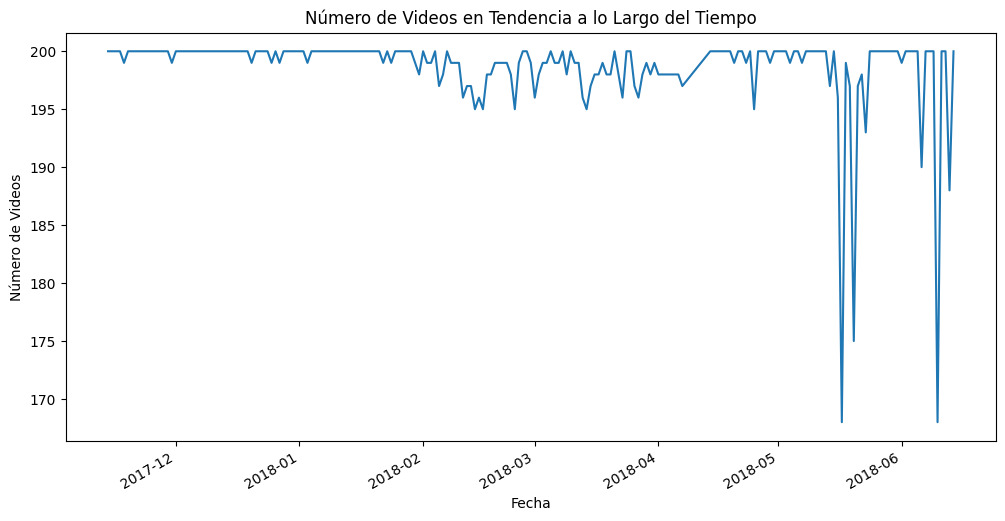

In [36]:
# Configuración de la figura y trazado del gráfico de línea
plt.figure(figsize=(12, 6))
videos_por_dia.plot(kind='line')

# Configuración de título y etiquetas de ejes
plt.title('Número de Videos en Tendencia a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Videos')

# Mostrar el gráfico
plt.show()

Este código realiza un análisis visual de la cantidad de videos en tendencia a lo largo del tiempo, utilizando un gráfico de línea para representar la tendencia. La figura resultante proporciona una representación visual clara de cómo ha evolucionado el volumen de videos en tendencia en el conjunto de datos.

## Por Canales de YouTube

6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?


Utilizamos el método value_counts() para contar la frecuencia de cada canal en la columna 'channel_title'. Esto creará una Serie que muestra cuántas veces cada canal ha aparecido en tendencia.

In [37]:
# Contar la frecuencia de cada canal en tendencia
canales_frecuencia = clean_FR['channel_title'].value_counts()

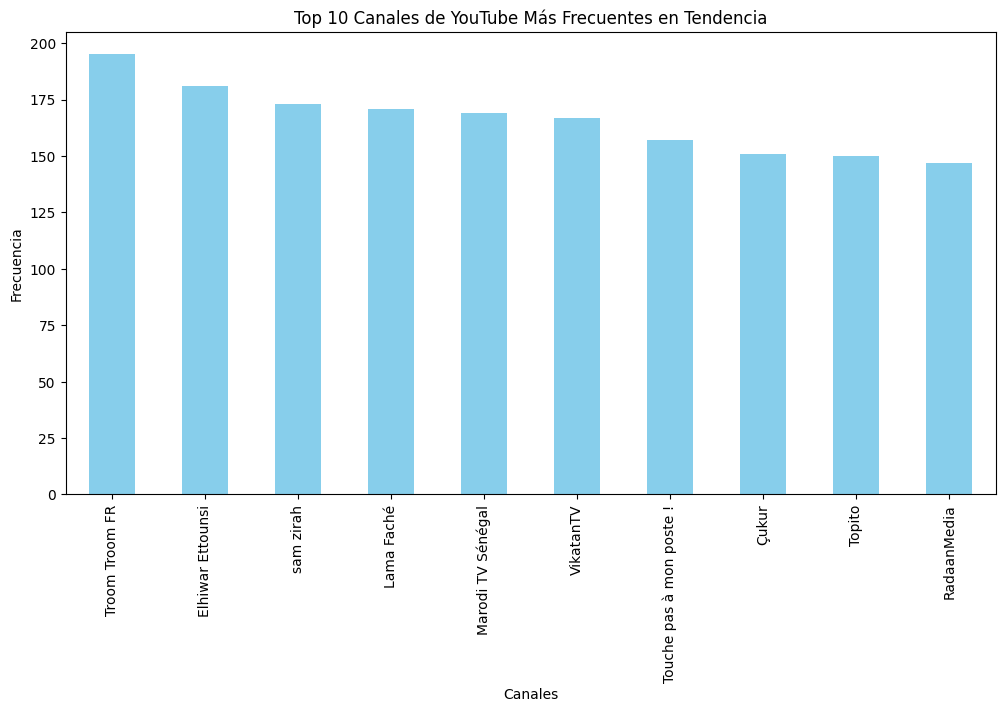

In [38]:
# Este código crea un gráfico de barras que muestra los 10 canales más frecuentes en tendencia.
plt.figure(figsize=(12, 6))
canales_frecuencia.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Canales de YouTube Más Frecuentes en Tendencia')
plt.xlabel('Canales')
plt.ylabel('Frecuencia')
plt.show()

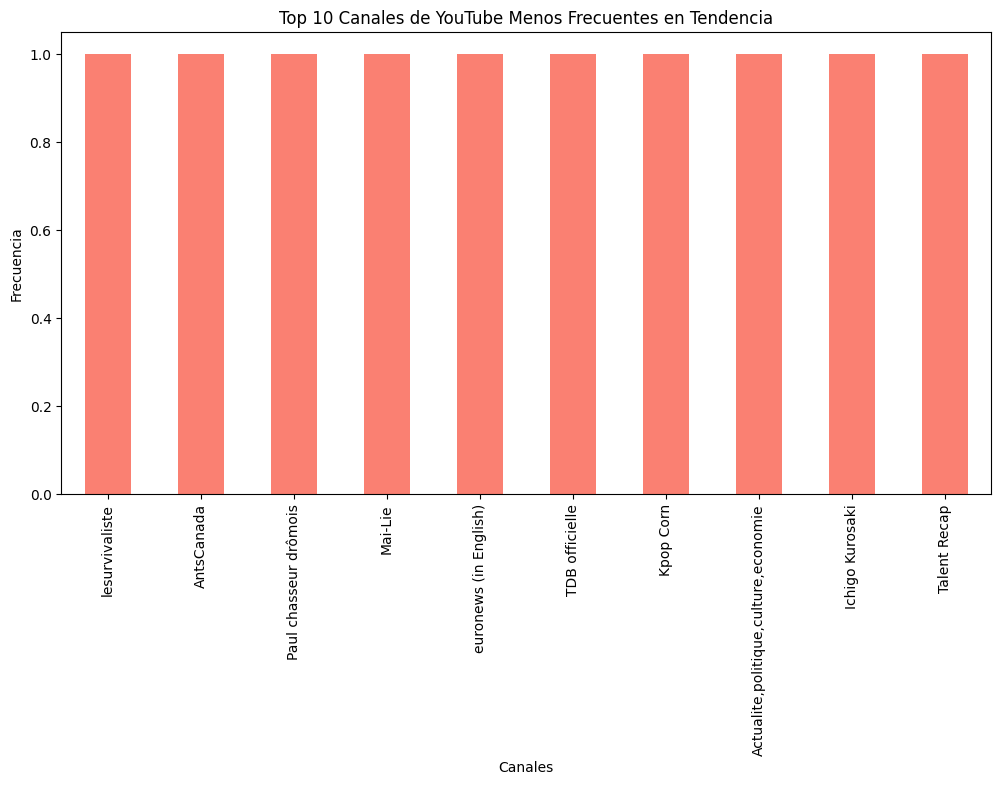

In [40]:
# Este código crea un gráfico de barras para mostrar los 10 canales menos frecuentes en tendencia.
plt.figure(figsize=(12, 6))
canales_frecuencia.tail(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Canales de YouTube Menos Frecuentes en Tendencia')
plt.xlabel('Canales')
plt.ylabel('Frecuencia')
plt.show()

## Por la geografía del país

7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?


In [41]:
# Agrupar por estado y calcular estadísticas:
estadisticas_por_estado = clean_FR.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
    'lat': 'mean',
    'lon': 'mean'
})

Agrupamos el DataFrame por la columna 'state' y se calcula la suma total de "Vistas", "Me gusta" y "No me gusta" para cada estado así como el promedio de su "latitud" y "longitud".

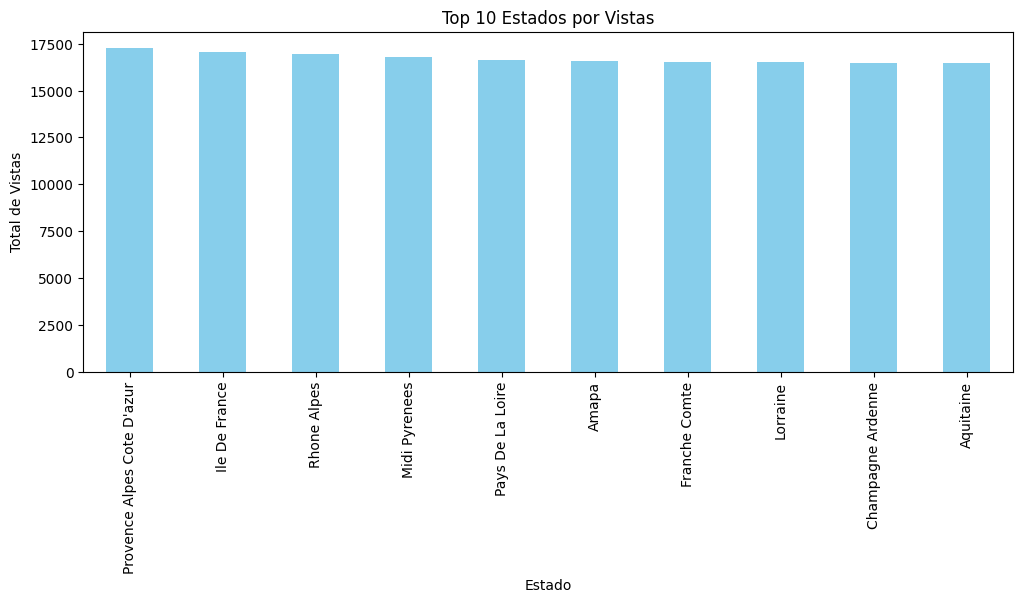

In [43]:
# Seleccionar los 10 estados con mayor cantidad de vistas
top_states_views = estadisticas_por_estado['views'].sort_values(ascending=False).head(10)

# Crear el gráfico de barras para vistas
plt.figure(figsize=(12, 15))
plt.subplot(3, 1, 1)
top_states_views.plot(kind='bar', color='skyblue')
plt.title('Top 10 Estados por Vistas')
plt.xlabel('Estado')
plt.ylabel('Total de Vistas')

# Ajustar el diseño y mostrar el gráfico
plt.show()

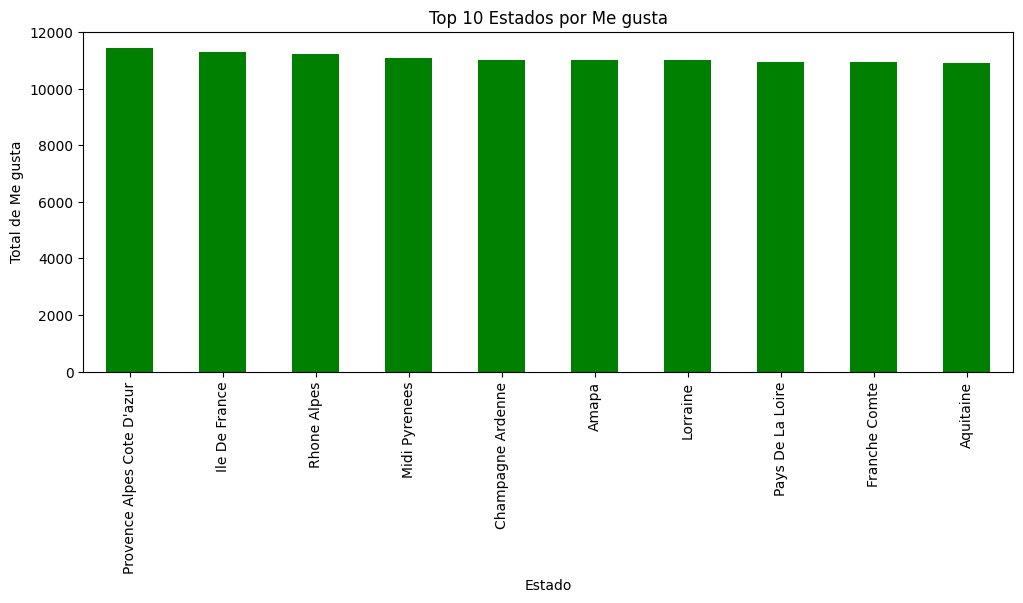

In [44]:
plt.figure(figsize=(12, 15))
# Seleccionar los 10 estados con mayor cantidad de Me gusta
top_states_likes = estadisticas_por_estado['likes'].sort_values(ascending=False).head(10)

# Crear el gráfico de barras para Me gusta
plt.subplot(3, 1, 2)
top_states_likes.plot(kind='bar', color='green')
plt.title('Top 10 Estados por Me gusta')
plt.xlabel('Estado')
plt.ylabel('Total de Me gusta')

plt.show()

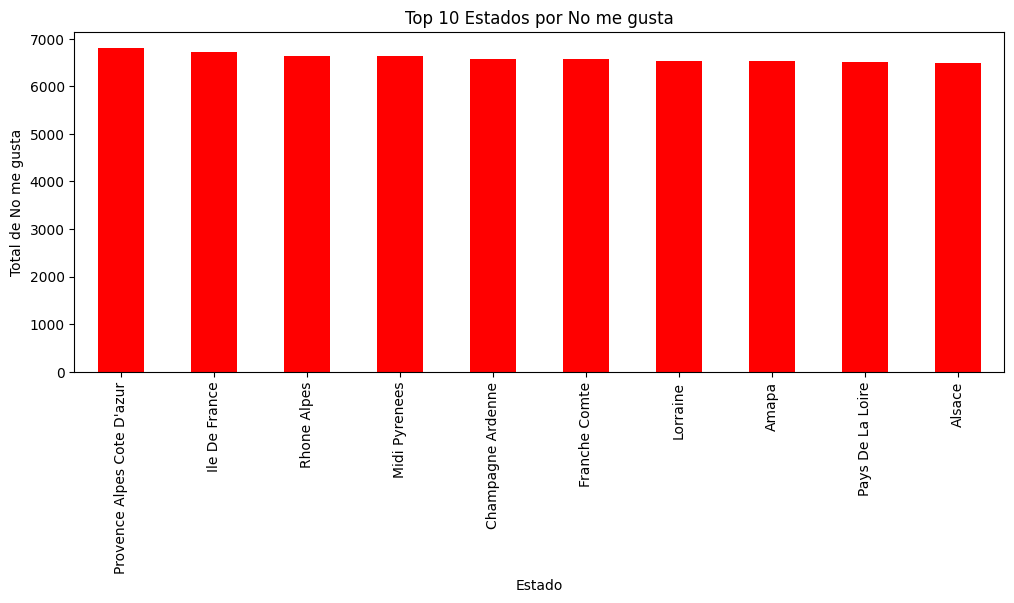

In [45]:
# Seleccionar los 10 estados con mayor cantidad de No me gusta
top_states_dislikes = estadisticas_por_estado['dislikes'].sort_values(ascending=False).head(10)

# Crear el gráfico de barras para No me gusta
plt.figure(figsize=(12, 15))
plt.subplot(3, 1, 3)
top_states_dislikes.plot(kind='bar', color='red')
plt.title('Top 10 Estados por No me gusta')
plt.xlabel('Estado')
plt.ylabel('Total de No me gusta')

plt.show()

Folium es una biblioteca de Python que se utiliza para visualizar datos geoespaciales de manera interactiva en mapas. Es especialmente útil cuando trabajas con conjuntos de datos que contienen información geográfica, como coordenadas de latitud y longitud. A continuación la instalaremos:

In [46]:
import folium

# Creamos un mapa centrado en Francia
mapa_estadisticas = folium.Map(location=[46.6031, 1.8883], zoom_start=6)

# Agregamos un marcador para cada estado con una ventana emergente que muestra estadísticas agregadas
for index, row in estadisticas_por_estado.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"State: {index}<br>Views: {row['views']}, Likes: {row['likes']}, Dislikes: {row['dislikes']}",
        icon=folium.Icon(color='blue')
    ).add_to(mapa_estadisticas)

# Mostramos el mapa
mapa_estadisticas.save('mapa_estadisticas.html')

Este codigo guarda el mapa interactivo como un archivo HTML llamado 'mapa_estadisticas.html'. Podemos abrir este archivo en un navegador web para visualizar el mapa interactivo con los marcadores y la información estadística.
![mapa_estadisticas.html.png](attachment:mapa_estadisticas.html.png)

8. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?


In [47]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecciona las características y la variable objetivo para regresión
X_reg = clean_FR[['dislikes']]
y_reg = clean_FR['views']

# Divide los datos en conjuntos de entrenamiento y prueba para regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Realizar predicciones en el conjunto de prueba para regresión
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluar el rendimiento del modelo de regresión
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f'Regresión - Mean Squared Error: {mse_reg}')
print(f'Regresión - R-squared: {r2_reg}')

# Visualizar el ajuste del modelo con un gráfico de dispersión
plt.scatter(X_test_reg, y_test_reg, color='black', label='Datos reales')
plt.plot(X_test_reg, y_pred_reg, color='blue', linewidth=3, label='Predicciones')
plt.title('Regresión Lineal - Predicción de Likes basada en Dislikes')
plt.xlabel('Dislikes')
plt.ylabel('Vistas')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'sklearn'

9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

Primero definiremos "comentarios positivos" usando una métrica personalizada que calculará la diferencia entre "me gusta" y "no me gusta" de cada video y se multiplicará el resultado por la cantidad de "comentarios" del video. De esta manera buscamos representar los "comentarios positivos" como el excedente de likes sobre dislikes y su cantidad de comentarios (entre mayor sea el resultado es porque el video tiene una mayor cantidad de comentarios positivos)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear una nueva columna para comentarios positivos
clean_FR['positive_comments'] = (clean_FR['likes'] - clean_FR['dislikes']) * clean_FR['comment_count']

# Definir las características y la variable objetivo para clasificación
X_clf = clean_FR[['likes', 'dislikes', 'comment_count']]
y_clf = clean_FR['positive_comments'] > 0  # Clasificar como positivo si positive_comments es mayor que 0

# Divide los datos en conjuntos de entrenamiento y prueba para clasificación
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
clf_model = LogisticRegression()
clf_model.fit(X_train_clf, y_train_clf)

# Realizar predicciones en el conjunto de prueba para clasificación
y_pred_clf = clf_model.predict(X_test_clf)

# Evaluar el rendimiento del modelo de clasificación
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)

print(f'Clasificación de Comentarios Positivos - Accuracy: {accuracy_clf}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_clf, y_pred_clf)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Calcular la curva de precisión y recall
precision, recall, _ = precision_recall_curve(y_test_clf, clf_model.predict_proba(X_test_clf)[:, 1])
area_under_curve = auc(recall, precision)

# Visualizar la curva de precisión y recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Área bajo la curva = {area_under_curve:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.legend(loc='lower right')
plt.show()